In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fnmatch
from itertools import chain

from img_utils import ImgUtils
from noised_image_datagen import NoisedImageDatagen
from unet import UNet

In [2]:
filenames = []
for dirpath, dirs, files in os.walk('Images'): 
  for filename in fnmatch.filter(files, '*.jpg'):
    filenames.append(os.path.join(dirpath, filename))

train_filenames = filenames[:1000] # only use first 100 images temporarily for quicker runtime
validation_filenames = filenames[1000:2000]

In [3]:
n_timesteps = 50
datagen = NoisedImageDatagen(train_filenames, n_timesteps=n_timesteps)
val_datagen = NoisedImageDatagen(validation_filenames, n_timesteps=n_timesteps)
batch = datagen[0]
print(batch[0].shape)
print(len(datagen))

(50, 64, 64, 3)
1000


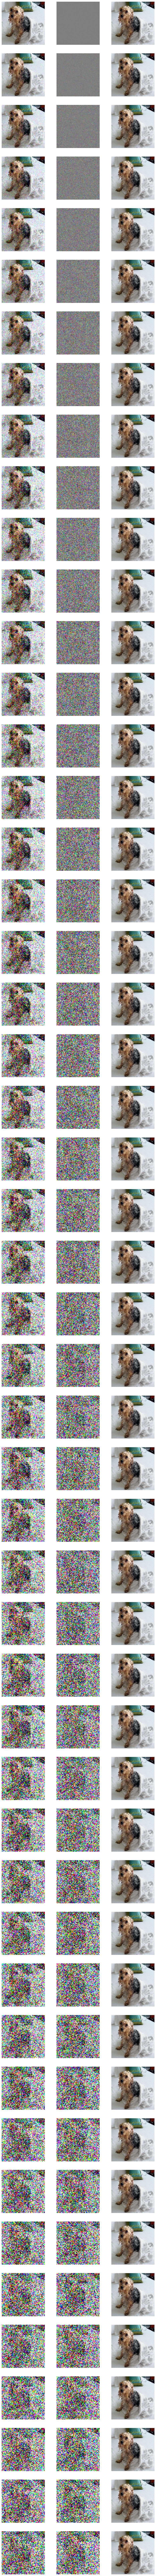

In [4]:
shown_imgs_X = [ImgUtils.unscale_img(img).clip(0,1) for img in batch[0]]
shown_imgs_y = [ImgUtils.unscale_img(img).clip(0,1) for img in batch[1]]
shown_imgs_recon = [ImgUtils.unscale_img(img1 + img2).clip(0,1) for img1, img2 in zip(batch[0], batch[1])]
ImgUtils.show_images(list(chain.from_iterable(zip(shown_imgs_X, shown_imgs_y, shown_imgs_recon))), cols=3)

In [5]:
unet = UNet.new()
L2 = lambda hx, y: (y-hx)**2
unet.compile(optimizer="adam", loss=L2, metrics=[L2])
unet.summary()

2022-11-14 17:44:34.817135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 17:44:34.817412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   448         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 16)   2320        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 16)   0           ['conv2d_1[0][0]']               
                  

In [6]:
hist = unet.fit(datagen, epochs=10, validation_data=val_datagen)

Epoch 1/10


2022-11-14 17:44:35.163096: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 17:44:35.485925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - ETA: 0s - loss: 0.2399 - <lambda>: 0.2399

2022-11-14 17:46:00.837522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 119s 118ms/step - loss: 0.2399 - <lambda>: 0.2399 - val_loss: 0.2260 - val_<lambda>: 0.2260
Epoch 2/10
1000/1000 [==============================] - 117s 117ms/step - loss: 0.2223 - <lambda>: 0.2223 - val_loss: 0.2216 - val_<lambda>: 0.2216
Epoch 3/10
1000/1000 [==============================] - 116s 116ms/step - loss: 0.2200 - <lambda>: 0.2200 - val_loss: 0.2238 - val_<lambda>: 0.2238
Epoch 4/10
1000/1000 [==============================] - 117s 117ms/step - loss: 0.2183 - <lambda>: 0.2183 - val_loss: 0.2193 - val_<lambda>: 0.2193
Epoch 5/10
1000/1000 [==============================] - 117s 117ms/step - loss: 0.2169 - <lambda>: 0.2169 - val_loss: 0.2188 - val_<lambda>: 0.2188
Epoch 6/10
1000/1000 [==============================] - 117s 117ms/step - loss: 0.2164 - <lambda>: 0.2164 - val_loss: 0.2197 - val_<lambda>: 0.2197
Epoch 7/10
1000/1000 [==============================] - 117s 117ms/step - loss: 0.2162 - <lambda>: 0.2162 - val_loss: 0.217

{'validation_data': None, 'model': <keras.engine.functional.Functional object at 0x2da5cdc10>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.23991727828979492, 0.22228071093559265, 0.2199622392654419, 0.21833527088165283, 0.21693415939807892, 0.21643006801605225, 0.21615296602249146, 0.21562419831752777, 0.21573249995708466, 0.21521751582622528], '<lambda>': [0.23991698026657104, 0.22228088974952698, 0.21996234357357025, 0.21833506226539612, 0.21693409979343414, 0.21643011271953583, 0.21615277230739594, 0.21562440693378448, 0.21573245525360107, 0.2152174413204193], 'val_loss': [0.22600184381008148, 0.22164228558540344, 0.22379356622695923, 0.21933887898921967, 0.21881085634231567, 0.2197030931711197, 0.21742522716522217, 0.21683374047279358, 0.21738003194332123, 0.21703876554965973], 'val_<lambda>': [0.2260017693042755, 0.22164218127727509, 0.22379367053508759, 0.21933874487876892, 0.2188108116388321, 0.21970294415950775, 0.21742495894432068, 0.21683372

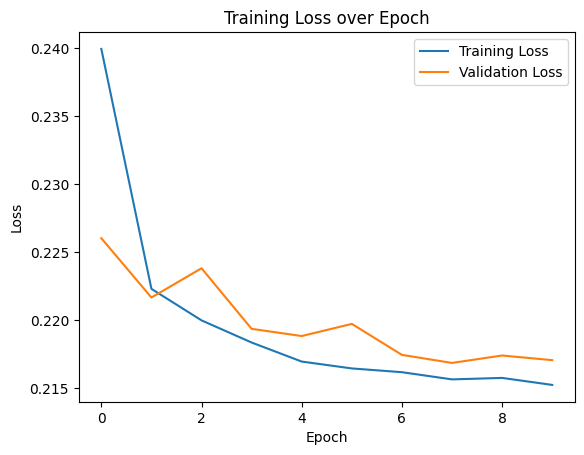

In [10]:
print(vars(hist))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epoch")
plt.show()

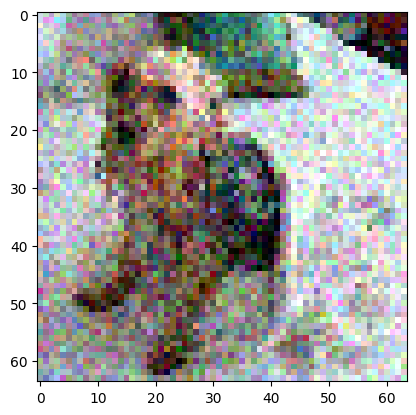

1/1 [==============================] - 0s 17ms/step


2022-11-14 18:04:11.854671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


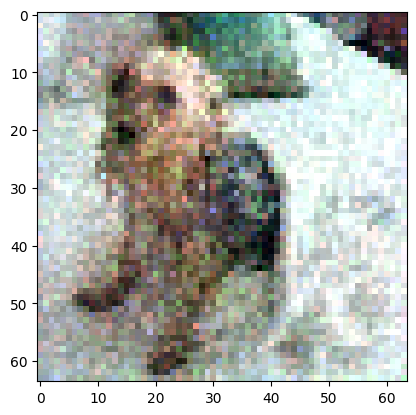

In [8]:
denoisee = batch[0][9]
plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

for i in range(n_timesteps * 5):
    noise_pred = unet.predict(np.array([denoisee]))[0]
    denoisee = denoisee + (1/n_timesteps) * noise_pred

plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

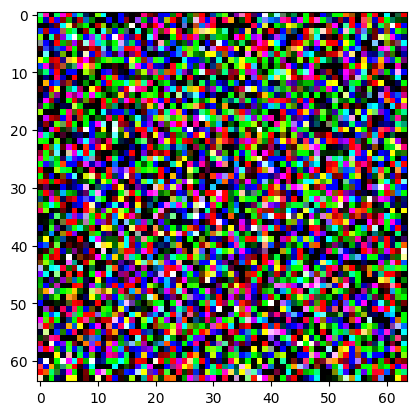

1/1 [==============================] - 0s 15ms/step


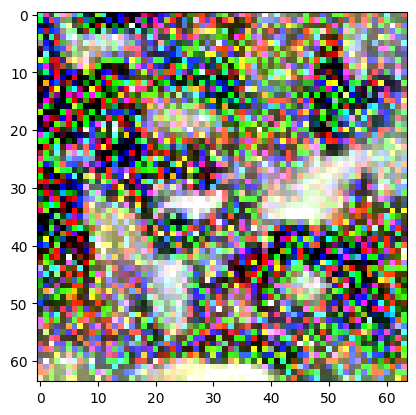

In [9]:
denoisee = np.random.randn(64, 64, 3) * 2 - 1
plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()

for i in range(n_timesteps * 5):
    noise_pred = unet.predict(np.array([denoisee]))[0]
    denoisee = denoisee + (1/n_timesteps) * noise_pred


plt.imshow(ImgUtils.unscale_img(denoisee).clip(0,1))
plt.show()